In [30]:
import re
import dateutil.parser
from pprint import pprint
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import ml_insights as mli
sns.set()

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [2]:
with open("movies_1980-2017.pkl", 'rb') as picklefile:
    df=pickle.load(picklefile)

In [3]:
df.shape

(5913, 14)

In [4]:
df.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'DayOfTheYear',
       'MonthOfTheYear', 'Director', 'ProductionBudget', 'InRelease',
       'MpaaRating', 'Distributor', 'Genre', 'Nominations', 'Wins'],
      dtype='object')

In [5]:
df.Genre.unique()

array(['Family Comedy', 'Romantic Comedy', 'Period Adventure', 'Thriller',
       'Animation', 'Comedy', 'Unknown', 'Comedy / Drama',
       'Action Comedy', 'Crime Comedy', 'Documentary', 'Foreign', 'Drama',
       'Sci-Fi Action', 'IMAX', 'Sci-Fi', 'Family', 'Period Action',
       'Sports Drama', 'Western', 'Music Drama', 'Adventure Comedy',
       'Crime Drama', 'Period Drama', 'Romance', 'Crime', 'War Drama',
       'Action Thriller', 'Horror Thriller', 'Family Adventure',
       'Sports Comedy', 'Horror', 'Sci-Fi Adventure', 'Drama / Thriller',
       'Fantasy Comedy', 'Action', 'War', 'Crime Thriller', 'Concert',
       'Fantasy Drama', 'War Romance', 'Sci-Fi Thriller',
       'Action / Crime', 'Period Comedy', 'Foreign / Action',
       'Romantic Thriller', 'Sci-Fi Horror', 'Comedy Thriller', 'Musical',
       'Fantasy', 'Action Horror', 'Sci-Fi Comedy', 'Period Horror',
       'Historical Epic', 'Action Fantasy', 'Horror Comedy', 'Adventure',
       'Action Drama', 'Action / A

In [6]:
df.MpaaRating.unique()

array(['G', 'PG-13', 'R', 'Unrated', 'PG', 'NC-17', None, 'Unknown',
       'Not Yet Rated'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5913 entries, http://www.boxofficemojo.com/movies/?id=102dalmatians.htm to http://www.boxofficemojo.com/movies/?id=zoolander2.htm
Data columns (total 14 columns):
Title                 5913 non-null object
DomesticTotalGross    5686 non-null float64
RunTime               5788 non-null float64
ReleaseDate           5913 non-null datetime64[ns]
DayOfTheYear          5913 non-null object
MonthOfTheYear        5913 non-null object
Director              3042 non-null object
ProductionBudget      2517 non-null float64
InRelease             4427 non-null object
MpaaRating            5912 non-null object
Distributor           5912 non-null object
Genre                 5912 non-null object
Nominations           5913 non-null int64
Wins                  5913 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 692.9+ KB


In [8]:
df.isnull().sum()

Title                    0
DomesticTotalGross     227
RunTime                125
ReleaseDate              0
DayOfTheYear             0
MonthOfTheYear           0
Director              2871
ProductionBudget      3396
InRelease             1486
MpaaRating               1
Distributor              1
Genre                    1
Nominations              0
Wins                     0
dtype: int64

In [9]:
missing_production_budgets=pd.read_csv("missing_production.csv")

In [10]:
missing_production_budgets.shape

(2871, 2)

In [11]:
# After scraping 2k of the missing 3400, found ~800

In [12]:
dropped_na=df.dropna(axis=0,how='any', inplace=False)

In [13]:
dropped_na.shape

(1497, 14)

In [14]:
#sns.pairplot(dropped_na)

In [15]:
dropped_na['Genre'].unique()

array(['Sports Drama', 'Foreign', 'Romantic Comedy', 'Drama',
       'Period Drama', 'Sci-Fi', 'Comedy', 'War', 'Sports Comedy',
       'War Romance', 'Action Comedy', 'Drama / Thriller',
       'Comedy Thriller', 'Horror', 'Sci-Fi Comedy', 'Action',
       'Fantasy Comedy', 'Fantasy', 'Historical Epic', 'Family Comedy',
       'Sci-Fi Horror', 'Animation', 'Action Drama', 'Musical',
       'Crime Comedy', 'Period Adventure', 'Period Action', 'Thriller',
       'Action Thriller', 'Sci-Fi Fantasy', 'Western Comedy',
       'Crime Drama', 'Music Drama', 'Romantic Thriller',
       'Comedy / Drama', 'Family Adventure', 'Romance', 'Fantasy Drama',
       'Action Horror', 'Documentary', 'Horror Comedy', 'Crime',
       'Action / Adventure', 'Period Horror', 'Adventure',
       'Sci-Fi Thriller', 'Action / Crime', 'Adventure Comedy',
       'Sci-Fi Action', 'Western', 'Crime Thriller', 'Historical Drama',
       'War Drama', 'Sci-Fi Adventure', 'Romantic Adventure', 'Family',
       'Foreign

In [16]:
genre_map={'Sports Drama':'Drama',
           'Foreign':'Foreign',
           'Romantic Comedy':'Romantic Comedy',
           'Drama':'Drama',
       'Period Drama':'Period',
           'Sci-Fi':'Sci-Fi',
           'Comedy':'Comedy',
           'War':'Action',
           'Sports Comedy':'Comedy',
       'War Romance':'Drama',
           'Action Comedy':'Comedy',
           'Drama / Thriller':'Drama',
       'Comedy Thriller':'Comedy',
           'Horror':'Horror',
           'Sci-Fi Comedy':'Sci-Fi',
           'Action':'Action',
       'Fantasy Comedy':'Comedy',
           'Fantasy':'Fantasy',
           'Historical Epic':'Drama',
           'Family Comedy':'Comedy',
       'Sci-Fi Horror':'Sci-Fi',
           'Animation':'Animation',
           'Action Drama':'Action',
           'Musical':'Other',
       'Crime Comedy':'Comedy',
           'Period Adventure':'Period',
           'Period Action':'Period',
           'Thriller':'Drama',
       'Action Thriller':'Action',
           'Sci-Fi Fantasy':'Fantasy',
           'Western Comedy':'Comedy',
       'Crime Drama':'Crime',
           'Music Drama':'Drama',
           'Romantic Thriller':'Drama',
       'Comedy / Drama':'Drama',
           'Family Adventure':'Other',
           'Romance':'Drama',
           'Fantasy Drama':'Fantasy',
       'Action Horror':'Action',
           'Documentary':'Documentary',
           'Horror Comedy':'Comedy',
           'Crime':'Crime',
       'Action / Adventure':'Action',
           'Period Horror':'Period',
           'Adventure':'Action',
       'Sci-Fi Thriller':'Sci-Fi',
           'Action / Crime':'Action',
           'Adventure Comedy':'Comedy',
       'Sci-Fi Action':'Sci-Fi',
           'Western':'Western',
           'Crime Thriller':'Crime',
           'Historical Drama':'Drama',
       'War Drama':'Drama',
           'Sci-Fi Adventure':'Sci-Fi',
           'Romantic Adventure':'Other',
           'Family':'Family',
       'Foreign / Horror':'Foreign',
           'Horror Thriller':'Horror',
           'Action Fantasy':'Action',
           'Concert':'Other'}

In [17]:
genre_map.values()

dict_values(['Drama', 'Foreign', 'Romantic Comedy', 'Drama', 'Period', 'Sci-Fi', 'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Horror', 'Sci-Fi', 'Action', 'Comedy', 'Fantasy', 'Drama', 'Comedy', 'Sci-Fi', 'Animation', 'Action', 'Other', 'Comedy', 'Period', 'Period', 'Drama', 'Action', 'Fantasy', 'Comedy', 'Crime', 'Drama', 'Drama', 'Drama', 'Other', 'Drama', 'Fantasy', 'Action', 'Documentary', 'Comedy', 'Crime', 'Action', 'Period', 'Action', 'Sci-Fi', 'Action', 'Comedy', 'Sci-Fi', 'Western', 'Crime', 'Drama', 'Drama', 'Sci-Fi', 'Other', 'Family', 'Foreign', 'Horror', 'Action', 'Other'])

In [18]:
dropped_na['GenreMap']=dropped_na['Genre']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
dropped_na.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'DayOfTheYear',
       'MonthOfTheYear', 'Director', 'ProductionBudget', 'InRelease',
       'MpaaRating', 'Distributor', 'Genre', 'Nominations', 'Wins',
       'GenreMap'],
      dtype='object')

In [20]:
dropped_na['GenreMap']=dropped_na.loc[:,'GenreMap'].map(genre_map)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
dropped_na['GenreMap'].unique()

array(['Drama', 'Foreign', 'Romantic Comedy', 'Period', 'Sci-Fi',
       'Comedy', 'Action', 'Horror', 'Fantasy', 'Animation', 'Other',
       'Crime', 'Documentary', 'Western', 'Family'], dtype=object)

In [22]:
#dropped_na.to_csv("oscars_dropped_cleaned.csv")

In [23]:
#dropped_na.describe()

In [24]:
df=dropped_na

In [25]:
df.head()

,Title,DomesticTotalGross,RunTime,ReleaseDate,DayOfTheYear,MonthOfTheYear,Director,ProductionBudget,InRelease,MpaaRating,Distributor,Genre,Nominations,Wins,GenreMap
http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,359,12,Michael Mann,107000000.0,52,R,Sony / Columbia,Sports Drama,2,0,Drama
http://www.boxofficemojo.com/movies/?id=amelie.htm,Amelie,33225499.0,122.0,2001-11-02,306,11,Jean-Pierre Jeunet,10000000.0,245,R,Miramax,Foreign,4,0,Foreign
http://www.boxofficemojo.com/movies/?id=americassweethearts.htm,America's Sweethearts,93607673.0,102.0,2001-07-20,201,07,Joe Roth,46000000.0,101,PG-13,Sony (Revolution),Romantic Comedy,0,0,Romantic Comedy
http://www.boxofficemojo.com/movies/?id=anygivensunday.htm,Any Given Sunday,75530832.0,157.0,1999-12-22,356,12,Oliver Stone,55000000.0,100,R,Warner Bros.,Sports Drama,0,0,Drama
http://www.boxofficemojo.com/movies/?id=babyboy.htm,Baby Boy,28734552.0,129.0,2001-06-27,178,06,John Singleton,16000000.0,75,R,Sony / Columbia,Drama,0,0,Drama


In [26]:
df.isnull().sum()

Title                 0
DomesticTotalGross    0
RunTime               0
ReleaseDate           0
DayOfTheYear          0
MonthOfTheYear        0
Director              0
ProductionBudget      0
InRelease             0
MpaaRating            0
Distributor           0
Genre                 0
Nominations           0
Wins                  0
GenreMap              0
dtype: int64

Text(0,0.5,'Nominations')

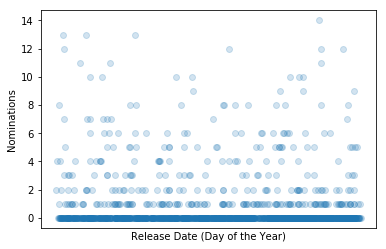

In [27]:
plt.scatter(sorted(df['DayOfTheYear']), df['Nominations'], alpha=.2)
plt.xticks([])
plt.xlabel("Release Date (Day of the Year)")
plt.ylabel('Nominations')

In [32]:
df['IntDayOfTheYear']=[int(x) for x in df['DayOfTheYear']]

In [28]:
df['DayOfTheYear^2'] = [int(x)**2 for x in df['DayOfTheYear']]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


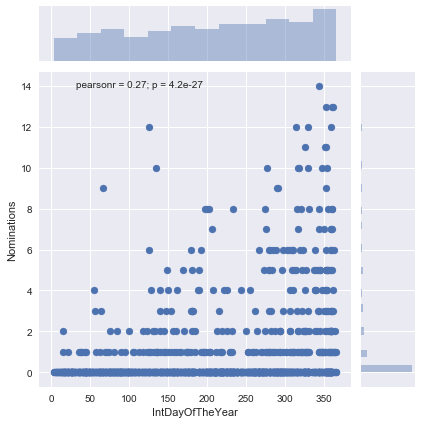

In [33]:
sns.jointplot('IntDayOfTheYear', 'Nominations', data=df)

In [30]:
#Split the data 70-30 train/test
features, target = ['DayOfTheYear^2'], ['Nominations']
X, y = df[features], df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
model3=LinearRegression()

In [31]:
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
model3.coef_

array([[1.39675504e-05]])

In [33]:
model3.intercept_

array([-0.03251804])

In [34]:
preds = model3.predict(X_test)

In [35]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,preds)

1.716209089074549

In [36]:
model3.score(X_train,y_train)

0.08684281822213646

In [37]:
model3.score(X_test,y_test)

0.09835500895242022

In [38]:
df.corr()

,DomesticTotalGross,RunTime,ProductionBudget,Nominations,Wins,DayOfTheYear^2
DomesticTotalGross,1.000000,0.275438,0.657115,0.256409,0.215332,-0.020458
RunTime,0.275438,1.000000,0.349656,0.351463,0.249255,0.157276
ProductionBudget,0.657115,0.349656,1.000000,0.100739,0.078505,-0.061171
Nominations,0.256409,0.351463,0.100739,1.000000,0.784104,0.299993
Wins,0.215332,0.249255,0.078505,0.784104,1.000000,0.199105
DayOfTheYear^2,-0.020458,0.157276,-0.061171,0.299993,0.199105,1.000000


([], <a list of 0 Text xticklabel objects>)

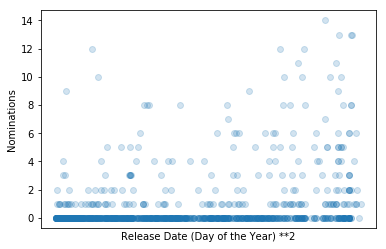

In [42]:
plt.scatter(X_train['DayOfTheYear^2'] ,y_train,alpha=.2)
plt.xlabel("Release Date (Day of the Year) **2")
plt.ylabel('Nominations')
plt.xticks([])

In [118]:
features, target = ['DayOfTheYear^2'], ['Nominations']
X, y = df[features], df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
model4=LinearRegression()

In [119]:
model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
model4.score(X_train,y_train)

0.08684281822213646

In [121]:
model4.score(X_test,y_test)

0.09835500895242022

In [129]:
df.to_csv("oscars_dropped_cleaned2.csv")

### Adding opening weekend

In [409]:
df

,Title,DomesticTotalGross,RunTime,ReleaseDate,DayOfTheYear,MonthOfTheYear,Director,ProductionBudget,InRelease,MpaaRating,Distributor,Genre,Nominations,Wins,GenreMap,DayOfTheYear^2
http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,359,12,Michael Mann,107000000.0,52,R,Sony / Columbia,Sports Drama,2,0,Drama,128881
http://www.boxofficemojo.com/movies/?id=amelie.htm,Amelie,33225499.0,122.0,2001-11-02,306,11,Jean-Pierre Jeunet,10000000.0,245,R,Miramax,Foreign,4,0,Foreign,93636
http://www.boxofficemojo.com/movies/?id=americassweethearts.htm,America's Sweethearts,93607673.0,102.0,2001-07-20,201,07,Joe Roth,46000000.0,101,PG-13,Sony (Revolution),Romantic Comedy,0,0,Romantic Comedy,40401
http://www.boxofficemojo.com/movies/?id=anygivensunday.htm,Any Given Sunday,75530832.0,157.0,1999-12-22,356,12,Oliver Stone,55000000.0,100,R,Warner Bros.,Sports Drama,0,0,Drama,126736
http://www.boxofficemojo.com/movies/?id=babyboy.htm,Baby Boy,28734552.0,129.0,2001-06-27,178,06,John Singleton,16000000.0,75,R,Sony / Columbia,Drama,0,0,Drama,31684
http://www.boxofficemojo.com/movies/?id=beautifulmind.htm,A Beautiful Mind,170742341.0,136.0,2001-12-21,355,12,Ron Howard,58000000.0,161,PG-13,Universal,Period Drama,8,4,Period,126025
http://www.boxofficemojo.com/movies/?id=bicentennialman.htm,Bicentennial Man,58223861.0,131.0,1999-12-17,351,12,Chris Columbus,100000000.0,168,PG,Buena Vista,Sci-Fi,1,0,Sci-Fi,123201
http://www.boxofficemojo.com/movies/?id=bigdaddy.htm,Big Daddy,163479795.0,93.0,1999-06-25,176,06,Dennis Dugan,34.0,129,PG-13,Sony / Columbia,Comedy,0,0,Comedy,30976
http://www.boxofficemojo.com/movies/?id=blackhawkdown.htm,Black Hawk Down,108638745.0,144.0,2001-12-28,362,12,Ridley Scott,92000000.0,108,R,Sony (Revolution),War,4,2,Action,131044
http://www.boxofficemojo.com/movies/?id=bowfinger.htm,Bowfinger,66384775.0,97.0,1999-08-13,225,08,Frank Oz,55000000.0,112,PG-13,Universal,Comedy,0,0,Comedy,50625


In [466]:
df['IntMonthOfTheYear']=[int(x) for x in df['MonthOfTheYear']]

In [467]:
df=df.drop(columns=['DayOfTheYear', 'MonthOfTheYear'])

In [468]:
!ls

1497-cleaned-opening.csv
1497_cleaned_final.csv
1980-2017_0001-4000.csv
1980-2017_4001-end.csv
2013_movies.csv
PairWork-luther-3-4.ipynb
Untitled.ipynb
all_data_with_na.csv
challenge_set_03_katie.ipynb
cleaned-1497-openingweekend.csv
enable1.txt
final-data.csv
final_oscars-cleaning.ipynb
missing_production.csv
missing_production_budget.ipynb
movies_1980-2017.pkl
oscar-scraping-opening-weekend.ipynb
oscar-scraping.ipynb
oscars
oscars_cleaning.ipynb
oscars_dropped_cleaned.csv
oscars_dropped_cleaned2.csv
oscars_eda_etc.ipynb
oscars_modelling-2.ipynb
oscars_modelling.ipynb
pair_programming_diabetes.ipynb
pairprobJuly11.ipynb
web_scraping_beautifulsoup_kaszklar.ipynb
web_scraping_selenium-kaszklar.ipynb


In [469]:
opening_df=pd.read_csv("cleaned-1497-openingweekend.csv")
opening_df=opening_df.set_index("Unnamed: 0")

In [470]:
opening_df.dtypes

OpeningGross      int64
OpeningRank     float64
dtype: object

In [471]:
opening_df.head()

,OpeningGross,OpeningRank
Unnamed: 0,,
http://www.boxofficemojo.com/movies/?id=10000bc.htm,35867488,1.0
http://www.boxofficemojo.com/movies/?id=2046.htm,113074,NaN
http://www.boxofficemojo.com/movies/?id=21.htm,24105943,1.0
http://www.boxofficemojo.com/movies/?id=21grams.htm,274454,NaN
http://www.boxofficemojo.com/movies/?id=25thhour.htm,108865,NaN


In [472]:
df=df.reset_index()

In [473]:
opening_df=opening_df.reset_index()

In [474]:
opening_df=opening_df.rename(columns={'Unnamed: 0': 'index'})

In [475]:
opening_df=opening_df.set_index('index')
opening_df.head()

,OpeningGross,OpeningRank
index,,
http://www.boxofficemojo.com/movies/?id=10000bc.htm,35867488,1.0
http://www.boxofficemojo.com/movies/?id=2046.htm,113074,NaN
http://www.boxofficemojo.com/movies/?id=21.htm,24105943,1.0
http://www.boxofficemojo.com/movies/?id=21grams.htm,274454,NaN
http://www.boxofficemojo.com/movies/?id=25thhour.htm,108865,NaN


In [476]:
df=df.set_index('index')

In [477]:
opening_df=opening_df.reset_index()

In [478]:
df=df.reset_index()

In [479]:
merged_df = df.merge(opening_df, how='outer', on='index')

In [480]:
merged_df.shape

(1497, 19)

In [369]:
#df["is_duplicate"]= df.duplicated()

In [316]:
#df=df.drop(columns=['is_duplicate'])

In [481]:
merged_df=merged_df.set_index('index')

In [482]:
merged_df.shape

(1497, 18)

In [483]:
merged_df.head()

,Title,DomesticTotalGross,RunTime,ReleaseDate,Director,ProductionBudget,InRelease,MpaaRating,Distributor,Genre,Nominations,Wins,GenreMap,DayOfTheYear^2,IntDayOfTheYear,IntMonthOfTheYear,OpeningGross,OpeningRank
index,,,,,,,,,,,,,,,,,,
http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,Michael Mann,107000000.0,52,R,Sony / Columbia,Sports Drama,2,0,Drama,128881,359,12,14710892.0,4.0
http://www.boxofficemojo.com/movies/?id=amelie.htm,Amelie,33225499.0,122.0,2001-11-02,Jean-Pierre Jeunet,10000000.0,245,R,Miramax,Foreign,4,0,Foreign,93636,306,11,136470.0,NaN
http://www.boxofficemojo.com/movies/?id=americassweethearts.htm,America's Sweethearts,93607673.0,102.0,2001-07-20,Joe Roth,46000000.0,101,PG-13,Sony (Revolution),Romantic Comedy,0,0,Romantic Comedy,40401,201,7,30181877.0,2.0
http://www.boxofficemojo.com/movies/?id=anygivensunday.htm,Any Given Sunday,75530832.0,157.0,1999-12-22,Oliver Stone,55000000.0,100,R,Warner Bros.,Sports Drama,0,0,Drama,126736,356,12,13584625.0,1.0
http://www.boxofficemojo.com/movies/?id=babyboy.htm,Baby Boy,28734552.0,129.0,2001-06-27,John Singleton,16000000.0,75,R,Sony / Columbia,Drama,0,0,Drama,31684,178,6,8606403.0,5.0


In [433]:
#merged_df=merged_df.reset_index()

In [434]:
#prod_budget=pd.read_csv('missing_production.csv')

In [435]:
#df.to_csv("1497-cleaned-opening.csv")

,Title,ProductionBudget
0,102 Dalmatians,85000000.0
1,10 Things I Hate About You,13000000.0
2,1998 Bugs Bunny Film Festival,NaN
3,200 Cigarettes,6000000.0
4,20 Dates,66000.0


In [436]:
#merged_df=merged_df.merge(prod_budget, how='outer', on='Title')

In [485]:
merged_df.isnull().sum()

Title                   0
DomesticTotalGross      0
RunTime                 0
ReleaseDate             0
Director                0
ProductionBudget        0
InRelease               0
MpaaRating              0
Distributor             0
Genre                   0
Nominations             0
Wins                    0
GenreMap                0
DayOfTheYear^2          0
IntDayOfTheYear         0
IntMonthOfTheYear       0
OpeningGross          135
OpeningRank           296
dtype: int64

In [486]:
merged_df=merged_df.dropna(axis=0,how='any', inplace=False)

In [493]:
#use this to remove the column
#merged_df=merged_df.drop(columns=['is_duplicate'])

In [499]:
merged_df["is_duplicate"]= merged_df.duplicated()

In [503]:
True in merged_df['is_duplicate']

False

In [382]:
#df_nodup = df.loc[df['is_duplicate'] == False]

In [384]:
#df_nodup.shape

(4284, 19)

In [327]:
#df_nodup.to_csv("1497_cleaned_final.csv")

In [328]:
#df=df_nodup

In [329]:
#df.shape

(4284, 19)

In [504]:
merged_df.isnull().sum()

Title                 0
DomesticTotalGross    0
RunTime               0
ReleaseDate           0
Director              0
ProductionBudget      0
InRelease             0
MpaaRating            0
Distributor           0
Genre                 0
Nominations           0
Wins                  0
GenreMap              0
DayOfTheYear^2        0
IntDayOfTheYear       0
IntMonthOfTheYear     0
OpeningGross          0
OpeningRank           0
is_duplicate          0
dtype: int64